# Basic DeepField

This notebook describes a representation of reservoir models within the `DeepField` framework.

At the top level all the data about the geological model are contained and manipulated by the `Field` class. To be more detailed, let's import `Field` and load some model. We will use a simplified modification of the open-source [NORNE]() model available in the  `DeepField` repository.

Required imports:

In [1]:
import sys
sys.path.append('..')

from deepfield import Field

Now we specify a path to the model (`.DATA` file) and run `load` method to read the data. The logger will indicate current steps of the process:

In [2]:
model = Field('../open_data/norne_simplified/norne_simplified.data').load()

INFO:Field:Using default config.
INFO:Field:Start reading norne_simplified.data
INFO:Field:[norne_simplified.data:3] Loading TITLE
INFO:Field:[norne_simplified.data:9] Loading START
...
INFO:Field:[schedule.inc:1041] Loading DATES
INFO:Field:[schedule.inc:1045] Loading COMPDAT
INFO:Field:Finish reading schedule.inc
INFO:Field:Finish reading norne_simplified.data
INFO:Field:===== Field summary =====
INFO:Field:GRID attributes: MAPAXES, DIMENS, ZCORN, COORD, ACTNUM
INFO:Field:ROCK attributes: PORO, PERMX, PERMY, PERMZ
INFO:Field:STATES attributes: PRESSURE, RS, SGAS, SOIL, SWAT
INFO:Field:TABLES attributes: PVTO, ROCK, PVTW, DENSITY, SWOF, SGOF, PVDG
INFO:Field:WELLS attributes: WELSPECS, COMPDAT, WELLTRACK, WCONPROD
INFO:Field:AQUIFERS attributes: 
INFO:Field:=========================
INFO:Field:Grid pillars (`COORD`) are mapped to new axis with respect to `MAPAXES`.


Before diving into the model, one can visualize the model using built-in interactive 3D viewer. For example, to visualize the porosity, we use
```python
model.show(attr='PORO')
```
This creates a separate interactive window that allows e.g. zooming in and out and rotating  (see https://docs.pyvista.org/plotting/plotting.html for more options). Below we demonstrate some static screenshots that one can easily reproduce:

<p>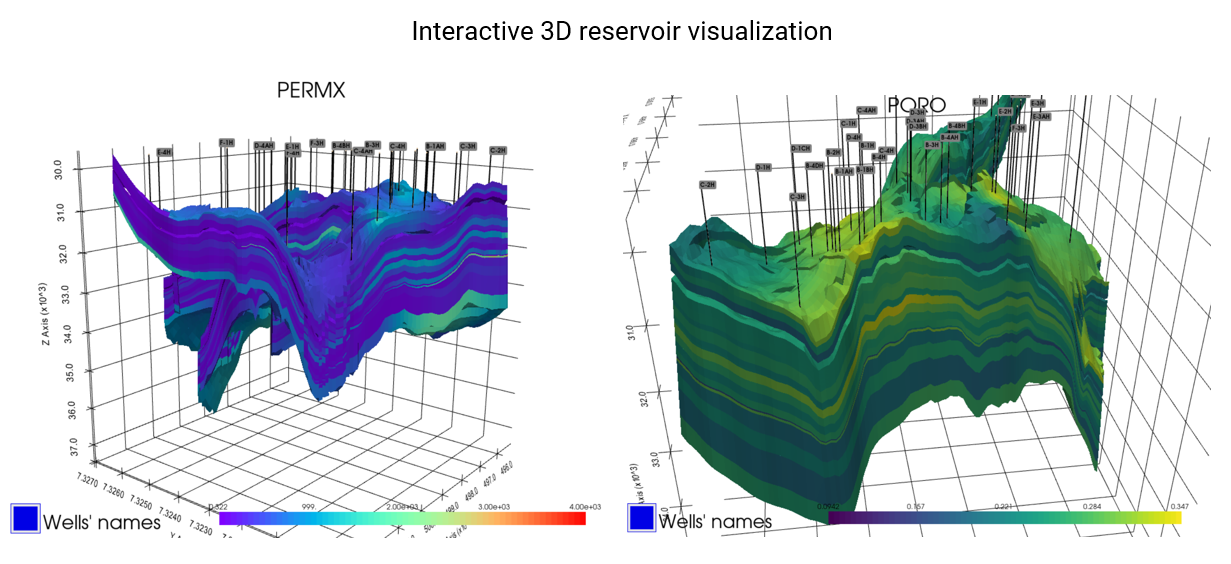</p>

The method `show` contains some advanced visualization options. For example, one can activate slice view and thersholding as shown below (see the [documentation](https://digital-petroleum.github.io/geology/api/field.html#geology.src.Field.show) for parameters of `show`):

<p>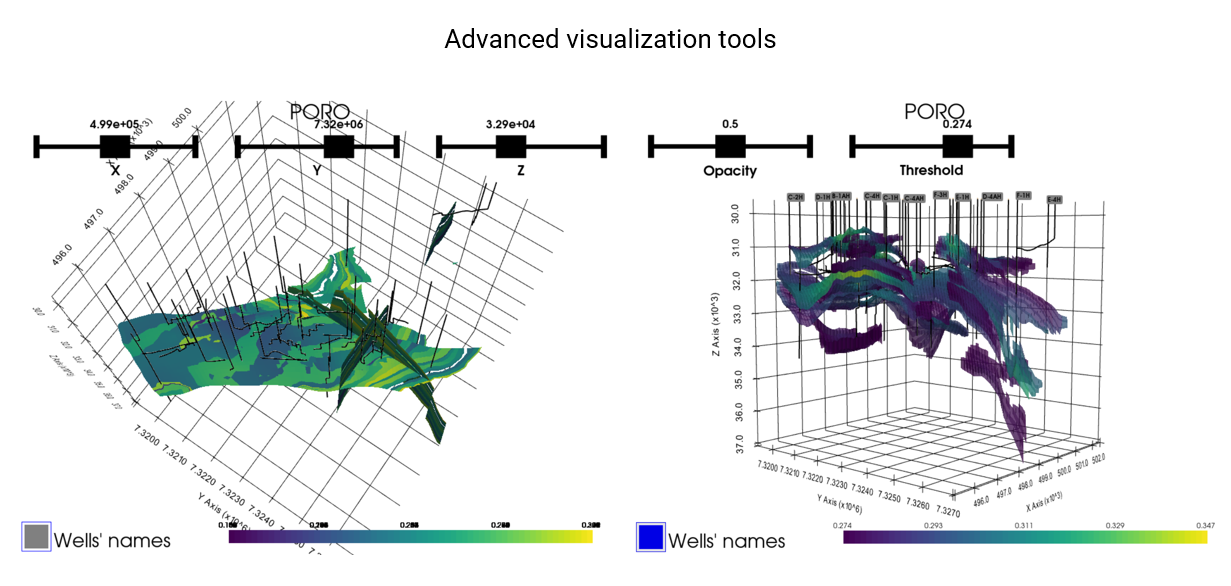</p>

Now we dive under the hood of the `Field` class. It contrains several components that represent the geological model. These components are as follows:

In [3]:
model.components

('grid', 'rock', 'states', 'tables', 'wells', 'aquifers')

Each component is a separate class instance that contains data and knows how to manipulate with the data. Data are stored under certain attribute names. Note that the list of attributes is model dependent (it depends of what `.DATA` file includes). For example, the Grid we loaded before contains the following attributes: 

In [4]:
model.grid.attributes

('MAPAXES', 'DIMENS', 'ZCORN', 'COORD', 'ACTNUM')

Each attribute contains some data, e.g.

In [5]:
model.grid.dimens

array([ 46, 112,  22])

For convenience, attributes are case-insensitive:

In [6]:
model.grid.DIMENS

array([ 46, 112,  22])

The Wells components is somehow special. It has a tree-like structure following natural wells ordering. The method `render_tree` shows wells and well groups ordering:

In [7]:
model.wells.render_tree()

FIELD
|-- INJE
|   |-- MANI-C
|   |   |-- C-1H
|   |   |-- C-2H
|   |   |-- C-3H
|   |   |-- C-4AH
|   |   +-- C-4H
|   |-- MANI-F
|   |   |-- F-1H
|   |   |-- F-2H
|   |   |-- F-3H
|   |   +-- F-4H
|   +-- WI-GSEG
+-- PROD
    |-- MANI-B2
    |   |-- B-1AH
    |   |-- B-1BH
    |   |-- B-1H
    |   +-- B-3H
    |-- MANI-B1
    |   |-- MANI-K1
    |   +-- B1-DUMMY
    |       |-- B-2H
    |       |-- B-4AH
    |       |-- B-4BH
    |       |-- B-4DH
    |       +-- B-4H
    |-- MANI-D1
    |   |-- D-1CH
    |   |-- D-1H
    |   |-- D-3AH
    |   |-- D-3BH
    |   +-- D-3H
    |-- MANI-D2
    |   |-- MANI-K2
    |   |   +-- K-3H
    |   +-- D2-DUMMY
    |       |-- D-2H
    |       |-- D-4AH
    |       +-- D-4H
    |-- MANI-E1
    |   |-- E-1H
    |   |-- E-3AH
    |   |-- E-3BH
    |   |-- E-3CH
    |   +-- E-3H
    +-- MANI-E2
        |-- E-2AH
        |-- E-2H
        |-- E-4AH
        +-- E-4H


Each node can be accessed by its name, e.g.:

In [8]:
model.wells['E-3H']

Now the idea is similar to what we have already seen. Each node has some attributes:

In [9]:
model.wells['E-3H'].attributes

('WELSPECS', 'COMPDAT', 'WELLTRACK')

and attributes contain data (usually, pandas DataFrames or Numpy arrays):

In [10]:
model.wells['E-3H'].compdat.head()

,DATE,WELL,I,J,K1,K2,MODE,Sat,CF,DIAM,KH,SKIN,ND,DIR,Ro
0,1998-08-30,E-3H,12,72,1,1,OPEN,NaN,30.745,0.216,2985.926,0,None,Z,19.644
1,1998-08-30,E-3H,12,72,9,9,OPEN,NaN,1.823,0.216,177.799,0,None,Z,20.066
2,1998-08-30,E-3H,12,72,6,6,OPEN,NaN,3.977,0.216,387.204,0,None,Z,19.886
3,1998-08-30,E-3H,12,72,17,17,OPEN,NaN,36.578,0.216,3568.139,0,None,Z,20.100
4,1998-08-30,E-3H,12,72,10,10,OPEN,NaN,159.910,0.216,15594.442,0,None,Z,20.070


Another one component that is somehow special is `Table`. Let's check firts the attributes it contains so far:

In [11]:
model.tables.attributes

('PVTO', 'ROCK', 'PVTW', 'DENSITY', 'SWOF', 'SGOF', 'PVDG')

Data in each attributes are stored in a pandas DataFrame, e.g.

In [12]:
model.tables.pvdg.head()

,FVF,VISC
PRESSURE,,
50.0,0.024958,0.01440
70.0,0.017643,0.01490
90.0,0.013615,0.01544
110.0,0.011081,0.01605
130.0,0.009352,0.01671


Tables can be easily visualized as follows:

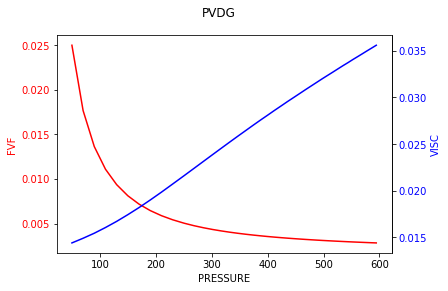

In [13]:
model.tables.pvdg.plot()

Moreover, one can query interpoleted values at any point or set of point:

In [14]:
model.tables.pvdg([40, 80, 100, 120])

array([[0.03148504, 0.01398137],
       [0.01536947, 0.01520006],
       [0.012218  , 0.01577044],
       [0.01014335, 0.01640131]])

Up to this point we have loaded a model from `.DATA` file and investigated its content. Suppose we modifed the model (e.g. run the simulation) and want to dump data. `Field` allows dumping back into `.DATA` format with optional binary files if you want to use them e.g. in ECLIPSE ot t-Navigator. However, if you stay with `DeepField`, we recomment to save data into a more efficient HDF5 file format:

In [15]:
model.dump(path='./model.hdf5', mode='w')

The benefit is that reading data from HDF5 file is order of magnitude faster in contrast to the conventional load:

In [16]:
%%time
model_restored = Field(path='./model.hdf5').load()

INFO:Field:===== Field summary =====
INFO:Field:AQUIFERS attributes: 
INFO:Field:GRID attributes: MAPAXES, ACTNUM, COORD, DIMENS, ZCORN
INFO:Field:ROCK attributes: PERMX, PERMY, PERMZ, PORO
INFO:Field:STATES attributes: PRESSURE, RS, SGAS, SOIL, SWAT
INFO:Field:TABLES attributes: DENSITY, PVDG, PVTO, PVTW, ROCK, SGOF, SWOF
INFO:Field:WELLS attributes: WELSPECS, COMPDAT, WELLTRACK, WCONPROD
INFO:Field:=========================
INFO:Field:Grid pillars (`COORD`) are mapped to new axis with respect to `MAPAXES`.
Wall time: 988 ms


The restored model is exactly similar to the model we loaded from `.DATA` file:

In [17]:
model_restored.components

('aquifers', 'grid', 'rock', 'states', 'tables', 'wells')

Done! Read the next tutorials for more details about model components.